In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# fetch MNIST data
from sklearn.datasets import fetch_openml
df , target = fetch_openml('mnist_784',version = 1, return_X_y=True)

In [3]:
df.shape

(70000, 784)

In [4]:
target.shape

(70000,)

(-0.5, 27.5, 27.5, -0.5)

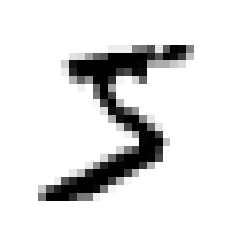

In [5]:
#showing an image from  mnist
img1 =  df[0].reshape(28,28)
plt.imshow(img1 , cmap = plt.cm.gray_r)
plt.axis('off')

In [6]:
#Performing PCA
# Step 1 - Standardize the image , else it will affect calculating the variance
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
df_scale = scaler.fit_transform(df)

(-0.5, 27.5, 27.5, -0.5)

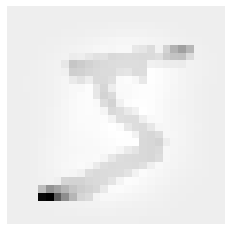

In [9]:
# show standardized image now 
img1 =  df_scale[0].reshape(28,28)
plt.imshow(img1 , cmap = plt.cm.gray_r)
plt.axis('off')

In [10]:
from sklearn.model_selection import train_test_split
# split data into training and validation sets
X_train,X_valid,y_train,y_valid = train_test_split(df_scale, target, test_size = 0.2 , random_state = 20)

In [11]:
print('Train Features shape - ' , X_train.shape)
print('Train Target shape - ', y_train.shape)
print('Validation Features shape -', X_valid.shape)
print('Validation Target shape -',y_valid.shape)

Train Features shape -  (56000, 784)
Train Target shape -  (56000,)
Validation Features shape - (14000, 784)
Validation Target shape - (14000,)


In [12]:
# create a random forest classifier without PCA
from sklearn.ensemble import RandomForestClassifier

In [14]:
rf = RandomForestClassifier(random_state = 1 , max_depth = 3 , n_estimators = 100)

In [16]:
# classification without PCA
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [17]:
pred_val = rf.predict(X_valid)

In [19]:
from sklearn.metrics import accuracy_score

print('Accuracy of training - ', accuracy_score(rf.predict(X_train),y_train))
print('Accuracy of validation - ', accuracy_score(rf.predict(X_valid),y_valid))


Accuracy of training -  0.7576607142857142
Accuracy of validation -  0.7567142857142857


In [20]:
# classification after PCA
from sklearn.decomposition import PCA

In [21]:
pca = PCA().fit(X_train)

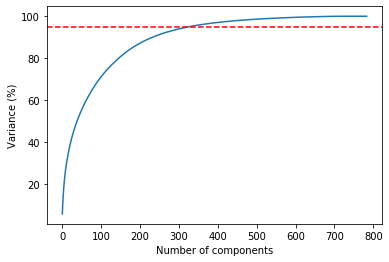

In [26]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.xlabel('Number of components')
plt.ylabel('Variance (%)')

plt.axhline(y=95, color = 'r' , linestyle = '--')

plt.show()

In [27]:
# 95 % of the variance is explained by around 350 components
pca = PCA(350)

In [28]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=350, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
X_train_trans = pca.transform(X_train)
X_valid_trans = pca.transform(X_valid)

In [30]:
#shape of data after transformation
X_train_trans.shape

(56000, 350)

In [31]:
X_valid_trans.shape

(14000, 350)

In [32]:
rf = RandomForestClassifier(random_state = 1 , max_depth = 3 , n_estimators = 100)

In [33]:
rf.fit(X_train_trans,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [35]:
from sklearn.metrics import accuracy_score

print('Accuracy of training - ', accuracy_score(rf.predict(X_train_trans),y_train))
print('Accuracy of validation - ', accuracy_score(rf.predict(X_valid_trans),y_valid))

Accuracy of training -  0.7846607142857143
Accuracy of validation -  0.7845714285714286
